# Word Tokenize Function

In [ ]:
def word_tokenize(text):
    tokens=text.split()
    return tokens
word_tokenize("Hola Mundo")

['Hola', 'Mundo']

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Tokenización:

In [ ]:
from nltk.tokenize import word_tokenize

sentence="NLTK es una biblioteca de procesamiento de lenguaje natural."
tokens=word_tokenize(sentence)
print(tokens)

['NLTK', 'es', 'una', 'biblioteca', 'de', 'procesamiento', 'de', 'lenguaje', 'natural', '.']


# Derivación:

In [ ]:
from nltk.stem import PorterStemmer

words=["running","plays","jumped"]
stemmer=PorterStemmer()
stems=[stemmer.stem(word) for word in words]
print(stems)

['run', 'play', 'jump']


# Etiquetado:

In [ ]:
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
from nltk.tokenize import word_tokenize

sentence="NLTK es una biblioteca de procesamiento de lenguaje natural."
tokens=word_tokenize(sentence)
pos_tags=pos_tag(tokens)
print(pos_tags)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('NLTK', 'NNP'), ('es', 'CC'), ('una', 'JJ'), ('biblioteca', 'NN'), ('de', 'IN'), ('procesamiento', 'FW'), ('de', 'FW'), ('lenguaje', 'FW'), ('natural', 'JJ'), ('.', '.')]


# Ejemplo

In [ ]:
import random

In [40]:
data = [
    ("I love this movie", "positive"),
    ("This movie is terrible", "negative"),
    ("This movie is great", "positive"),
    ("I dislike this movie", "negative"),
    ("This film is amazing", "positive"),
    ("I can't stand watching this movie", "negative"),
    ("The acting in this movie is phenomenal", "positive"),
    ("I regret wasting my time on this film", "negative"),
    ("I thoroughly enjoyed this movie", "positive"),
    ("This movie lacks depth and substance", "negative"),
    ("The plot of this movie was captivating", "positive"),
    ("I found the characters in this film to be very engaging", "positive"),
    ("The special effects in this movie were impressive", "positive"),
    ("The storyline was predictable and unoriginal", "negative"),
    ("I was disappointed by the lack of character development", "negative"),
    ("The cinematography in this film was stunning", "positive"),
    ("The dialogue felt forced and unnatural", "negative"),
    ("The pacing of the movie was too slow for my liking", "negative"),
    ("I was pleasantly surprised by how much I enjoyed this film", "positive"),
    ("The ending left me feeling unsatisfied and confused", "negative"),
    ("This movie exceeded my expectations", "positive"),
    ("The performances by the actors were lackluster", "negative")
]

# Dividir datos y etiquetas
X = [x[0] for x in data]
y = [1 if x[1] == 'positive' else 0 for x in data]

# Codificar datos
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from sklearn.model_selection import train_test_split
ectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(X)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

# Convertir a formato requerido por NLTK
X_train_nltk = [(dict(zip(vectorizer.get_feature_names_out(), row.toarray()[0])), label) for row, label in zip(X_train, y_train)]
X_test_nltk = [(dict(zip(vectorizer.get_feature_names_out(), row.toarray()[0])), label) for row, label in zip(X_test, y_test)]


# Entrenamiento del clasicador:

In [41]:
# Entrenar el modelo
model = nltk.NaiveBayesClassifier.train(X_train_nltk)

# Predecir
y_pred = [model.classify(dict(zip(vectorizer.get_feature_names_out(), row.toarray()[0]))) for row in X_test]

# Evaluación del clasicador:

In [42]:
accuracy=nltk.classify.accuracy(model,X_test_nltk)
print("Accuracy:",accuracy)

Accuracy: 0.8


# Clasicación de un nuevo texto:

In [43]:
new_text="This movie is amazing"
new_text_features=preprocess(new_text)
predicted_label=model.classify(new_text_features)
print("Prediction label:",predicted_label)

Prediction label: 1


# Métricas

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
predicted_labels=[model.classify(features) for (features,_) in X_test_nltk]
true_labels = [label for (_, label) in X_test_nltk]
accuracy=accuracy_score(true_labels,predicted_labels)
precision=precision_score(true_labels, predicted_labels, average='weighted')
recall=recall_score(true_labels,predicted_labels, average='weighted')
f1=f1_score(true_labels,predicted_labels, average='weighted')
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1 score:",f1)

Accuracy: 0.8
Precision: 0.85
Recall: 0.8
F1 score: 0.7809523809523808


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.75      1.00      0.86         3

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5


Confusion Matrix:
[[1 1]
 [0 3]]


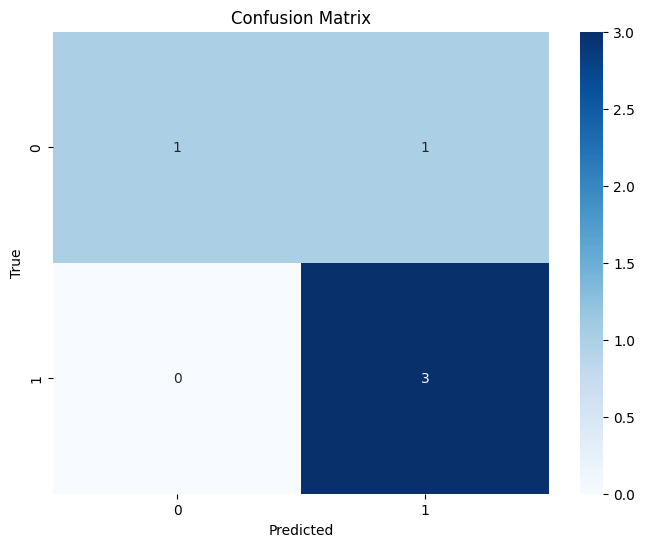

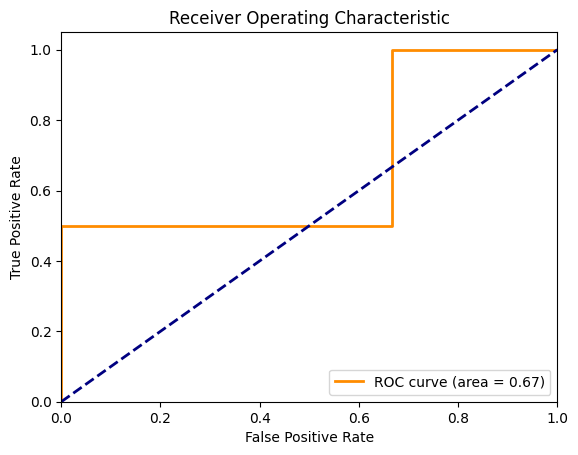


Indices of Misclassified Instances: [3]


In [45]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ... (Your existing code for generating predicted_labels and true_labels) ...

# Classification Report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("\nConfusion Matrix:")
print(cm)

# Confusion Matrix Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.labels(), yticklabels=model.labels())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC (Assuming binary classification for simplicity)
# If you have multi-class, you'll need to adapt this part
if len(model.labels()) == 2:
    # Convert labels to binary (0 and 1) if they aren't already
    binary_true_labels = [1 if label == model.labels()[0] else 0 for label in true_labels]
    probas = [model.prob_classify(features).prob(model.labels()[0]) for (features, _) in X_test_nltk]
    fpr, tpr, thresholds = roc_curve(binary_true_labels, probas)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Error Distribution
errors = [i for i in range(len(true_labels)) if true_labels[i] != predicted_labels[i]]
print("\nIndices of Misclassified Instances:", errors)

# You can further analyze the error distribution by examining the features
# of the misclassified instances or plotting histograms of relevant features.


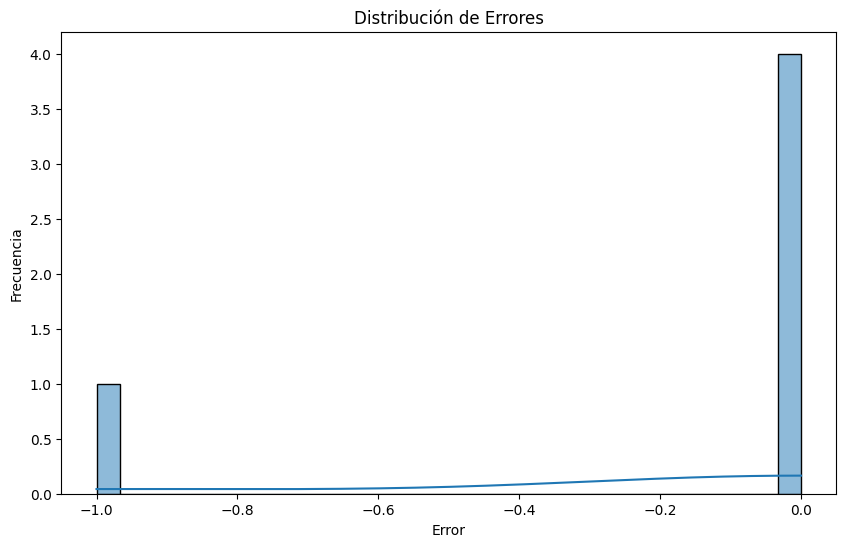

Accuracy: 0.8000


In [46]:
# Calcular errores
errors = [y_real - y_pred for y_real, y_pred in zip(y_test, y_pred)]

# Graficar distribución de errores
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, bins=30)
plt.title("Distribución de Errores")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.show()

# Métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")